# Task 6.2C

# Introduction

This analysis aims to evaluate the clustering performance of different clustering techniques in a microclimate sensor dataset, with SensorLocation used as the ground truth for evaluation.

# Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv("microclimate-sensors-data.csv")
df

,Device_id,Time,SensorLocation,LatLong,MinimumWindDirection,AverageWindDirection,MaximumWindDirection,MinimumWindSpeed,AverageWindSpeed,GustWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
0,ICTMicroclimate-08,2025-02-09T11:54:37+11:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,153.0,358.0,0.0,3.9,7.9,23.9,57.300000,1009.700000,0.0,0.0,80.500000
1,ICTMicroclimate-11,2025-02-09T12:02:11+11:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,144.0,356.0,0.0,2.0,7.8,24.5,56.200000,1005.300000,0.0,0.0,62.900000
2,ICTMicroclimate-05,2025-02-09T12:03:24+11:00,Enterprize Park - Pole ID: COM1667,"-37.8204083, 144.9591192",0.0,45.0,133.0,0.0,1.5,2.7,25.0,60.000000,1009.600000,1.0,3.0,68.500000
3,ICTMicroclimate-01,2025-02-09T12:02:43+11:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,150.0,NaN,NaN,1.6,NaN,23.1,61.099998,1009.000000,0.0,5.0,51.700001
4,ICTMicroclimate-09,2025-02-09T12:17:37+11:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,241.0,359.0,0.0,0.9,4.4,25.6,53.700000,1007.900000,0.0,0.0,60.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308235,ICTMicroclimate-08,2025-04-18T15:32:17+10:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,48.0,359.0,0.0,1.7,7.4,30.5,27.300000,1005.700000,5.0,5.0,76.600000
308236,ICTMicroclimate-04,2025-04-18T15:31:00+10:00,Batman Park,"-37.8221828, 144.9562225",0.0,304.0,359.0,0.0,0.4,4.2,30.3,29.700000,1008.500000,8.0,8.0,65.700000
308237,ICTMicroclimate-01,2025-04-18T15:29:15+10:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,347.0,NaN,NaN,0.1,NaN,31.9,21.100000,1004.700012,10.0,13.0,57.299999
308238,ICTMicroclimate-11,2025-04-18T15:51:11+10:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,340.0,359.0,0.0,5.0,7.5,30.4,28.800000,1001.100000,5.0,7.0,76.300000


In [2]:
df.shape

(308240, 16)

In [3]:
a = df["Time"].unique()
a.sort()
a

array(['2024-05-29T13:47:33+10:00', '2024-05-29T13:49:14+10:00',
       '2024-05-29T13:49:46+10:00', ..., '2025-04-18T15:47:23+10:00',
       '2025-04-18T15:49:41+10:00', '2025-04-18T15:51:11+10:00'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308240 entries, 0 to 308239
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Device_id             308240 non-null  object 
 1   Time                  308240 non-null  object 
 2   SensorLocation        302097 non-null  object 
 3   LatLong               296757 non-null  object 
 4   MinimumWindDirection  276852 non-null  float64
 5   AverageWindDirection  307762 non-null  float64
 6   MaximumWindDirection  276694 non-null  float64
 7   MinimumWindSpeed      276694 non-null  float64
 8   AverageWindSpeed      307762 non-null  float64
 9   GustWindSpeed         276694 non-null  float64
 10  AirTemperature        307762 non-null  float64
 11  RelativeHumidity      307762 non-null  float64
 12  AtmosphericPressure   307762 non-null  float64
 13  PM25                  294491 non-null  float64
 14  PM10                  294491 non-null  float64
 15  

In [5]:
df["SensorLocation"].value_counts()

SensorLocation
1 Treasury Place                                                                    35891
Birrarung Marr Park - Pole 1131                                                     30984
Tram Stop 7C - Melbourne Tennis Centre Precinct - Rod Laver Arena                   30929
SkyFarm (Jeff's Shed). Rooftop - Melbourne Conference & Exhibition Centre (MCEC)    30884
CH1 rooftop                                                                         30871
101 Collins St L11 Rooftop                                                          30815
Tram Stop 7B - Melbourne Tennis Centre Precinct - Rod Laver Arena                   30741
Swanston St - Tram Stop 13 adjacent Federation Sq & Flinders St Station             30314
Batman Park                                                                         21491
Enterprize Park - Pole ID: COM1667                                                  15954
Royal Park Asset ID: COM2707                                                        1

## Data Cleaning and Preprocessing

### Feature Removal

Several features have been removed due to being identifiers and redundant with other features that are not relevant for clustering. The remaining features better represent the environmental conditions for meaningful cluster analysis.

In [6]:
df = df.drop(columns=['Device_id', 'Time', 'LatLong', 'MinimumWindSpeed', 'MaximumWindDirection', "MinimumWindDirection",'GustWindSpeed'
                      ])


### Handling Missing SensorLocation

Rows with missing SensorLocation were removed to retain only labeled data for evaluating clustering performance.

In [7]:
df = df.dropna(subset=['SensorLocation'])


### Investigation of Missing PM/Noise Data

significant number of entries were found to be incomplete.

In [8]:
df.isnull().sum()

SensorLocation              0
AverageWindDirection      326
AverageWindSpeed          326
AirTemperature            326
RelativeHumidity          326
AtmosphericPressure       326
PM25                    13549
PM10                    13549
Noise                   13549
dtype: int64

To understand the source,  any missing value in PM25, PM10, or Noise is filtered for all rows.
This revealed that 13,223 out of 13,549 missing rows (over 97%) originated from a single sensor location "Royal Park Asset ID: COM2707, suggests that this sensor does not collect PM or Noise data at all, likely due to hardware limitations.



In [9]:
missing_rows = df[df[['PM25', 'PM10', 'Noise']].isnull().any(axis=1)]
missing_rows['SensorLocation'].value_counts()


SensorLocation
Royal Park Asset ID: COM2707                                                        13223
1 Treasury Place                                                                      222
CH1 rooftop                                                                            32
Birrarung Marr Park - Pole 1131                                                        23
101 Collins St L11 Rooftop                                                             15
Tram Stop 7C - Melbourne Tennis Centre Precinct - Rod Laver Arena                       8
SkyFarm (Jeff's Shed). Rooftop - Melbourne Conference & Exhibition Centre (MCEC)        7
Enterprize Park - Pole ID: COM1667                                                      7
Tram Stop 7B - Melbourne Tennis Centre Precinct - Rod Laver Arena                       5
Swanston St - Tram Stop 13 adjacent Federation Sq & Flinders St Station                 4
Batman Park                                                                          

PM2.5, PM10, and Noise are critical features for clustering microclimate conditions, as they reflect pollution and environmental stress, a key aspects of distinguishing sensor regions. 

However, the "Royal Park Asset ID: COM2707" sensor contributes 13,223 rows, all of which are missing values for these three features.

Imputing such a large portion of missing data is not reliable in this context, especially since meaningful imputation would typically require patterns within the same sensor location and this sensor records no values at all for PM and Noise. Alternatively,exclusing PM and noise from the clustering model to accommodate this sensor would significantly reduce clustering quality across all other sensors.

As a result, the Royal Park sensor was removed to ensure feature consistency and maintain the integrity of the clustering process across all remaining observations.

In [10]:
df = df[df['SensorLocation'] != 'Royal Park Asset ID: COM2707']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288874 entries, 0 to 308239
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SensorLocation        288874 non-null  object 
 1   AverageWindDirection  288548 non-null  float64
 2   AverageWindSpeed      288548 non-null  float64
 3   AirTemperature        288548 non-null  float64
 4   RelativeHumidity      288548 non-null  float64
 5   AtmosphericPressure   288548 non-null  float64
 6   PM25                  288548 non-null  float64
 7   PM10                  288548 non-null  float64
 8   Noise                 288548 non-null  float64
dtypes: float64(8), object(1)
memory usage: 22.0+ MB


### Final Missing Values Cleanup

After removing Royal Park, 326 rows still contained missing values across all core features. Since no meaningful imputation could be performed and these rows carried no usable data, as imputation wil only cause repetitive data, we removed them as well.

In [12]:
df.isnull().sum()

SensorLocation            0
AverageWindDirection    326
AverageWindSpeed        326
AirTemperature          326
RelativeHumidity        326
AtmosphericPressure     326
PM25                    326
PM10                    326
Noise                   326
dtype: int64

In [13]:
df = df.dropna(subset=['AverageWindDirection'])


In [14]:
df.isnull().sum()

SensorLocation          0
AverageWindDirection    0
AverageWindSpeed        0
AirTemperature          0
RelativeHumidity        0
AtmosphericPressure     0
PM25                    0
PM10                    0
Noise                   0
dtype: int64

### Visualization

In [15]:
df.describe()

,AverageWindDirection,AverageWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
count,288548.000000,288548.000000,288548.000000,288548.000000,288548.000000,288548.000000,288548.000000,288548.00000
mean,169.232415,1.129437,17.419482,64.337469,997.004982,23.413851,7.267352,66.24499
std,121.178246,0.981487,6.232470,18.364424,125.717806,133.940484,9.569357,13.56722
min,0.000000,0.000000,0.000000,4.000000,20.900000,0.000000,0.000000,0.00000
25%,52.000000,0.400000,13.200000,53.600000,1008.300000,1.000000,3.000000,58.90000
50%,164.000000,0.900000,17.000000,66.200000,1013.900000,3.000000,5.000000,68.30000
75%,292.000000,1.500000,20.800000,77.200000,1019.000000,6.000000,8.000000,72.40000
max,359.000000,11.100000,40.800000,99.800003,1042.900000,1030.700000,265.000000,131.10000


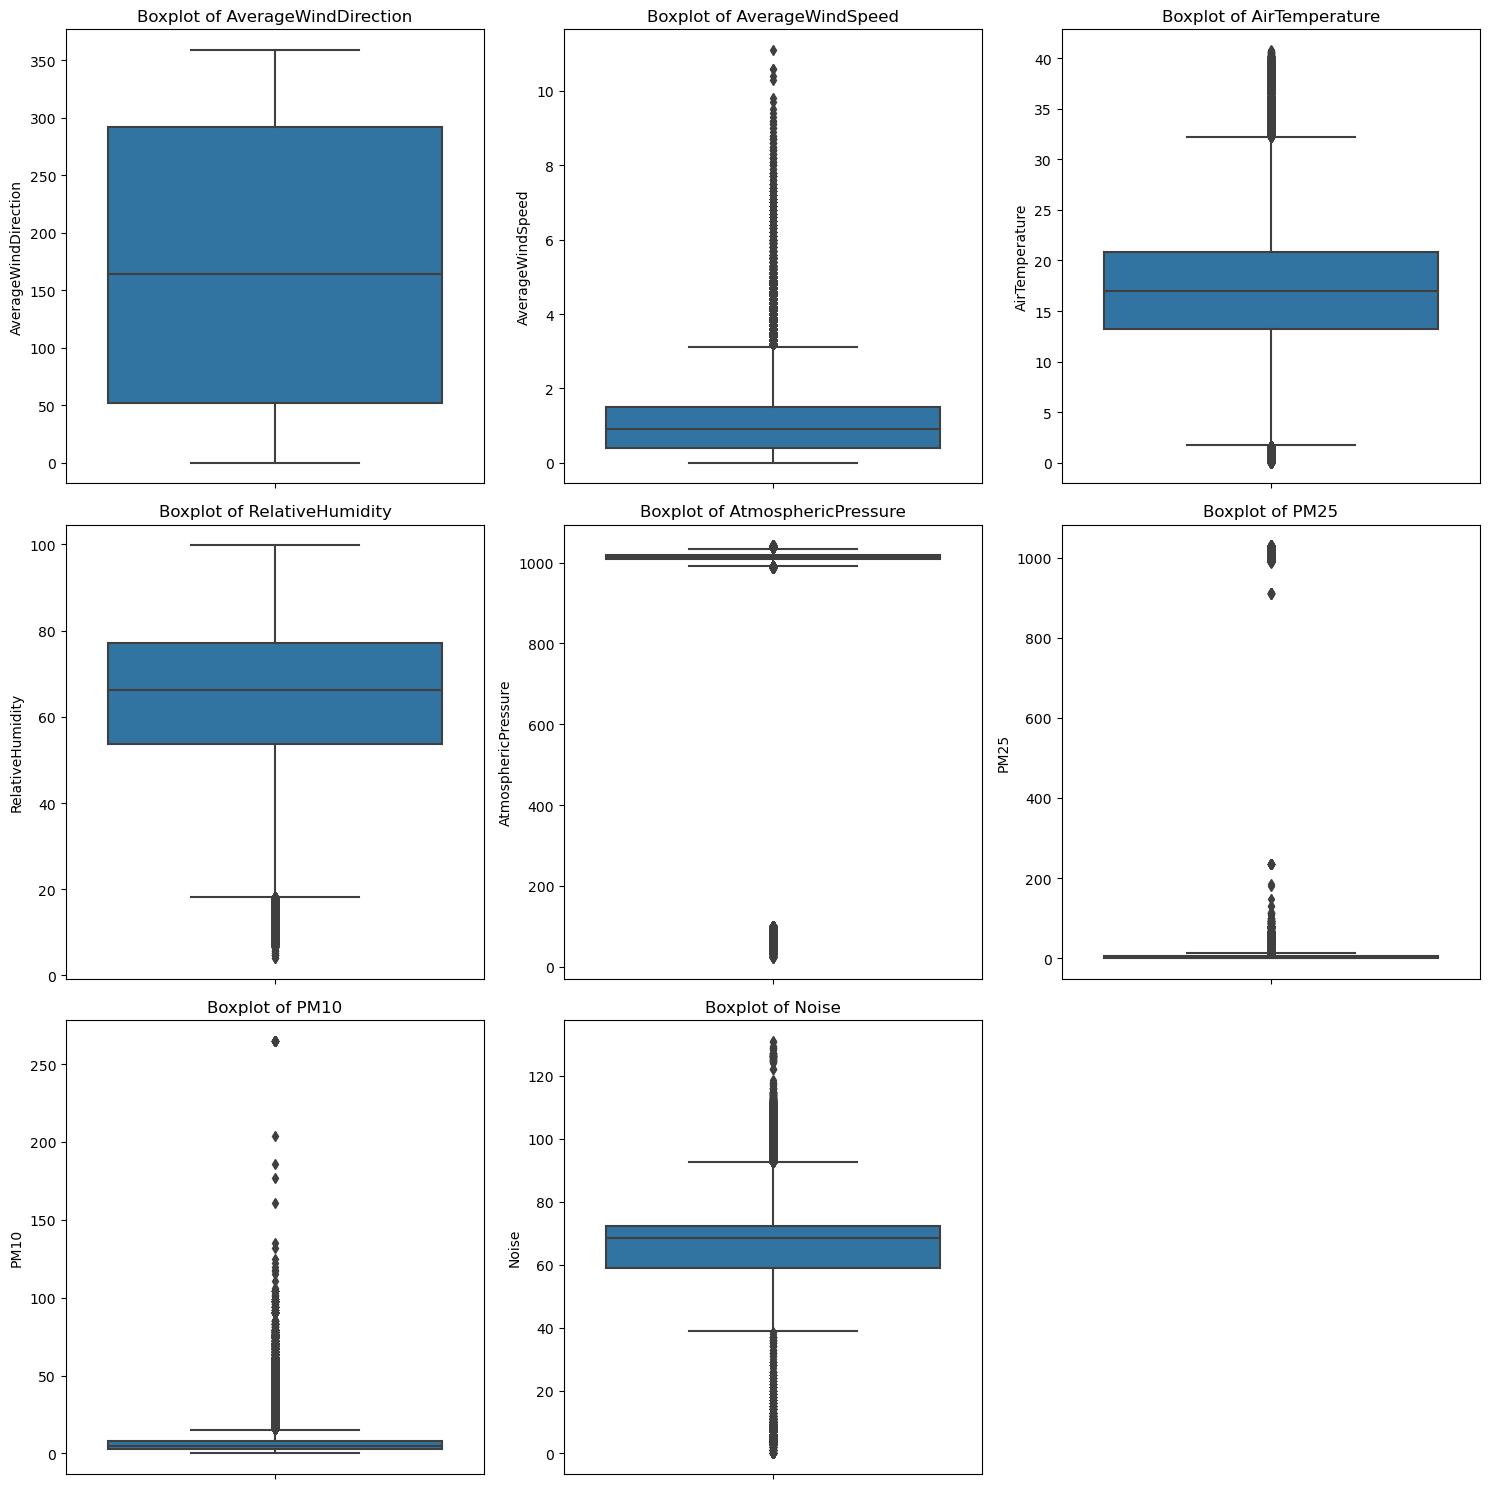

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# drop label due to its categorical feature
numeric_columns = df.drop(columns='SensorLocation')

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  
axes = axes.flatten()

for i in range(len(numeric_columns.columns)):
    sns.boxplot(y=numeric_columns.iloc[:, i], ax=axes[i])
    axes[i].set_title(f'Boxplot of {numeric_columns.columns[i]}')
    
for j in range(len(numeric_columns.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Both the boxplots and descriptive statistics provide strong evidence of outliers in several features, particularly in PM2.5, PM10, and AtmosphericPressure. These outliers could be due to natural environmental events or sensor anomalies. 

### Standardize data

Rather than removing the outlier that may lost important dataset, the dataset is stadardize using z-score normalization. This process rescale all numeric column to have a mean of 0 and a standard deviation of 1. stardadization help reduce the infleunce of extreme value in distance-based model such as clustering, without discarding any data points. Standardization reduce the influence of large value, reduce the bias and maintain the integrity of the original dataset without discarding any data points.

In [17]:
data_norm=df.copy()
mu = data_norm.iloc[:,1:].mean(axis=0) # mean of each col
sigma = data_norm.iloc[:,1:].std(axis=0)  # std dev of each col
data_norm.iloc[:,1:]=(data_norm.iloc[:,1:]-mu)/sigma

data_norm

,SensorLocation,AverageWindDirection,AverageWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
0,Swanston St - Tram Stop 13 adjacent Federation...,-0.133955,2.822822,1.039799,-0.383212,0.100980,-0.174808,-0.759440,1.050695
1,1 Treasury Place,-0.208226,0.886984,1.136069,-0.443111,0.065981,-0.174808,-0.759440,-0.246549
2,Enterprize Park - Pole ID: COM1667,-1.025204,0.377553,1.216294,-0.236189,0.100185,-0.167342,-0.445939,0.166210
3,Birrarung Marr Park - Pole 1131,-0.158712,0.479439,0.911439,-0.176290,0.095412,-0.174808,-0.236939,-1.072069
4,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,0.592248,-0.233764,1.312564,-0.579243,0.086662,-0.174808,-0.759440,-0.445559
...,...,...,...,...,...,...,...,...,...
308235,Swanston St - Tram Stop 13 adjacent Federation...,-1.000447,0.581325,2.098770,-2.016805,0.069163,-0.137478,-0.236939,0.763237
308236,Batman Park,1.112143,-0.743195,2.066680,-1.886118,0.091435,-0.115080,0.076562,-0.040170
308237,Birrarung Marr Park - Pole 1131,1.466993,-1.048854,2.323400,-2.354415,0.061209,-0.100148,0.599063,-0.659309
308238,1 Treasury Place,1.409226,3.943571,2.082725,-1.935126,0.032573,-0.137478,-0.027938,0.741125


# Question 1

In [18]:
X=data_norm.iloc[:,1:]
X

,AverageWindDirection,AverageWindSpeed,AirTemperature,RelativeHumidity,AtmosphericPressure,PM25,PM10,Noise
0,-0.133955,2.822822,1.039799,-0.383212,0.100980,-0.174808,-0.759440,1.050695
1,-0.208226,0.886984,1.136069,-0.443111,0.065981,-0.174808,-0.759440,-0.246549
2,-1.025204,0.377553,1.216294,-0.236189,0.100185,-0.167342,-0.445939,0.166210
3,-0.158712,0.479439,0.911439,-0.176290,0.095412,-0.174808,-0.236939,-1.072069
4,0.592248,-0.233764,1.312564,-0.579243,0.086662,-0.174808,-0.759440,-0.445559
...,...,...,...,...,...,...,...,...
308235,-1.000447,0.581325,2.098770,-2.016805,0.069163,-0.137478,-0.236939,0.763237
308236,1.112143,-0.743195,2.066680,-1.886118,0.091435,-0.115080,0.076562,-0.040170
308237,1.466993,-1.048854,2.323400,-2.354415,0.061209,-0.100148,0.599063,-0.659309
308238,1.409226,3.943571,2.082725,-1.935126,0.032573,-0.137478,-0.027938,0.741125


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.26602429, -2.26052185,  1.00861056, -0.01386277,  1.5545308 ],
       [-0.28584439, -1.3418595 , -0.43579702, -0.2868101 ,  0.34335291],
       [-0.36239777, -0.86689965, -1.03317341, -0.01868101,  0.84856029],
       ...,
       [ 0.13659524, -2.06843479, -1.58122151,  1.43577324, -2.4489639 ],
       [-1.41214921, -4.14129979,  1.5916974 ,  1.31193444,  0.47192329],
       [-0.10004996, -1.98145684, -1.25992263,  0.85514607, -2.1040172 ]])

[34.91 56.34 71.02 82.37 92.95]


Text(0, 0.5, 'Variance captured')

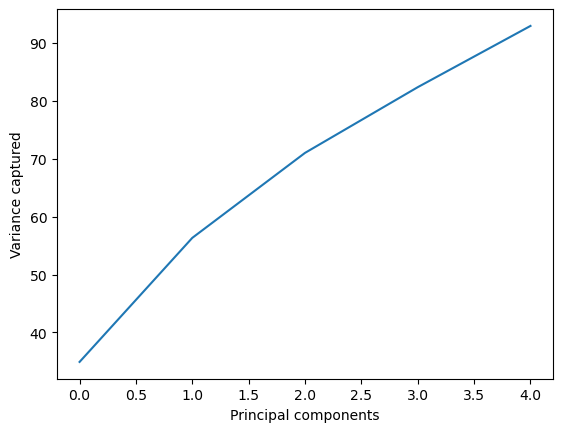

In [20]:
import numpy as np

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

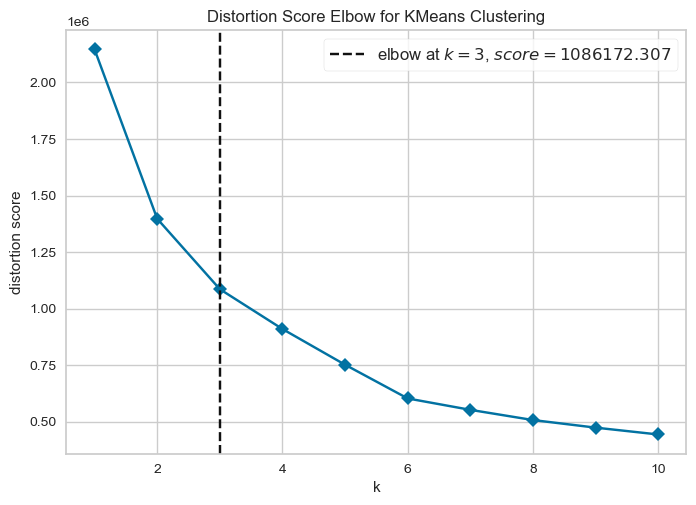

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,11), metric='distortion', timings=False
) #distortion (default) same as Euclidean distance

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()  

In [22]:
from sklearn.metrics import silhouette_score, normalized_mutual_info_score

y_true=data_norm.iloc[:,0]
model = KMeans(n_clusters=3)
y_pred=model.fit_predict(X_pca)

/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=1000)
y_pred = model.fit_predict(X_pca)

from sklearn.metrics import silhouette_score, normalized_mutual_info_score

silhouette = silhouette_score(X_pca, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
purity = purity_score(y_true, y_pred)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"NMI Score: {nmi:.3f}")
print(f"Purity Score: {purity:.3f}")

/Users/michellelai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


step 1 - pca

step-2 - use elbow method kind the optimak number of cluster



3- perform clustering kmean or other algorithm

In [ ]:
silhouette = silhouette_score(X_pca, y_pred)
purity = purity_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

print(f"Silhouette Score (Full Dataset): {silhouette:.3f}")
print(f"Purity Score: {purity:.3f}")
print(f"Mutual info Score: {nmi:.3f}")